In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def sigmoid_func(power):
    #sigmoid function always returns output in range 0 to 1
    return 1.0/(1.0 + np.exp(-power))

# Lets try to plot a Sigmoid Curve 

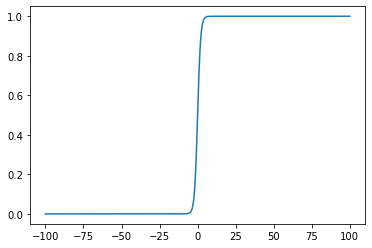

In [3]:
fig = plt.figure()  
ax = plt.axes()  
  
x = np.linspace(-100, 100, 1000)  
ax.plot(x, sigmoid_func(x))

# 2. Plot a 2-D Contour plot for dummny values of X and Y

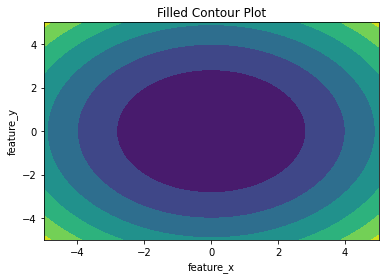

In [4]:
feature_x = np.linspace(-5.0, 5.0, 70)
feature_y = np.linspace(-5.0, 5.0, 70)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
  
fig, ax = plt.subplots(1, 1)
  
Z = X ** 2 + Y ** 2
  
# plots filled contour plot
ax.contourf(X, Y, Z)
  
ax.set_title('Filled Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
  
plt.show()

# 3. Plot a 3-D Contour plot for dummny values of X and Y

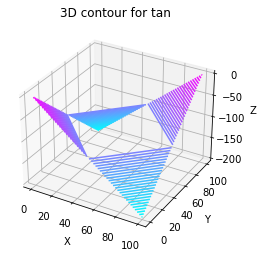

In [5]:
from mpl_toolkits import mplot3d
from matplotlib import cm
import math

x = [i for i in range(0, 200, 100)]
y = [i for i in range(0, 200, 100)]

X, Y = np.meshgrid(x, y)
Z = []
for i in x:
	t = []
	for j in y:
		t.append(math.tan(math.sqrt(i*2+j*2)))
	Z.append(t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.cool)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D contour for tan')
plt.show()


# 4. Train SigmoidNeuron Model on the dummy TOY dataset and do contour plotting

# 4.1 Lets Create a Sigmoid Neuron

In [6]:
class SigmoidNeuron:
    def __init__(self, learning_rate=0.01, iterations = 1000):
        self.b = None   #bias
        self.W = None
        self.lr = learning_rate
        self.iters = iterations
        self.errorPerItr = None
        
    def sigmoid_func(self,power):
        #sigmoid function always returns output in range 0 to 1
        return 1.0/(1.0 + np.exp(-power))
    
    def predict(self, X):
        y_pred = []
        for index in range(len(X)):
            x=X.iloc[index]
            linear_output = np.dot(x, self.W) + self.b  #we got the exponent
            y_predicted = self.sigmoid_func(linear_output)
            y_pred.append(y_predicted)
        return y_pred
        
    
    #sigmoid neuron needs a principled learning algorithm for learning the values of W and B
    def gradientDescent(self, X, Y):
        self.b = 0
        n_features = X.shape[1]
        self.W = np.zeros(n_features)
        
        #ensure that y is 0 or 1
        y_ = np.array([1 if i>0 else 0 for i in Y])
        
        self.errorPerItr = []
        
        #we assume that sigmoid model will converge in finite iterations
        for itr in range(self.iters):
            # In every epoch we need to care about Weights of next epoch
            # W' = W - lr * grad(W)
            # b' = b - lr* grad(b)
            # So In each epoch we calculate the gradient
            grad_w = 0
            grad_b = 0
            loss = 0
            for index in range(len(X)):
                x=X.iloc[index]
                linear_output = np.dot(x, self.W) + self.b  #we got the exponent
                y_predicted = self.sigmoid_func(linear_output)
                fx = y_predicted
                
                y= Y.iloc[index]
                grad_w += (fx - y)*fx*(1-fx)*np.dot(np.ones(n_features), x)
                grad_b += (fx - y)*fx*(1-fx)
                
                #for each epoch we will calculate the loss
                loss += (fx - y)**2
            self.errorPerItr.append(0.5 * loss) #0.5 is justfor convenience
            print("Loss: ", 0.5 * loss)
            
            #calculate new W and b
            for i in range(n_features): # since W is a vector
                self.W[i] -= self.lr*grad_w
            self.b -= self.lr*grad_b    # b is a scalar
            print("weights: ", self.W)
            print("Bias: ", self.b)
            
            

# 

#  lets read and process toy dataset

In [7]:
data = pd.read_csv('toy_dataset.csv')
data

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [8]:
data = data.dropna()
data

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [9]:
#columns = ["Number", "Age", "Income", "Illness"]
columns = ["Number", "Age", "Illness"]
data = data[columns]
data

,Number,Age,Illness
0,1,41,No
1,2,54,No
2,3,42,No
3,4,40,No
4,5,46,No
...,...,...,...
149995,149996,48,No
149996,149997,25,No
149997,149998,26,No
149998,149999,25,No


In [10]:
data["Illness"].value_counts()

No     137861
Yes     12139
Name: Illness, dtype: int64

In [11]:
data['Illness'] = data['Illness'].replace(to_replace='No', value=0)
data['Illness'] = data['Illness'].replace(to_replace='Yes', value=1)
#data['Illness'] = data['Illness'].replace(['No'],0)
#data['Illness'] = data['Illness'].replace(['Yes'],1)
data

C:\Users\aniranjan\AppData\Local\Temp\ipykernel_11060\242144838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Illness'] = data['Illness'].replace(to_replace='No', value=0)
C:\Users\aniranjan\AppData\Local\Temp\ipykernel_11060\242144838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Illness'] = data['Illness'].replace(to_replace='Yes', value=1)


,Number,Age,Illness
0,1,41,0
1,2,54,0
2,3,42,0
3,4,40,0
4,5,46,0
...,...,...,...
149995,149996,48,0
149996,149997,25,0
149997,149998,26,0
149998,149999,25,0


In [12]:
data["Illness"].value_counts()

0    137861
1     12139
Name: Illness, dtype: int64

#  4.2 Balancing the data

In [13]:
#reduce data of class 0
data_class_0_filter = data[data.Illness!=1]
data_class_0_filter

,Number,Age,Illness
0,1,41,0
1,2,54,0
2,3,42,0
3,4,40,0
4,5,46,0
...,...,...,...
149995,149996,48,0
149996,149997,25,0
149997,149998,26,0
149998,149999,25,0


In [14]:
reduced_data_class_0 = data_class_0_filter.loc[0:12139]
reduced_data_class_0["Illness"].value_counts()

0    11170
Name: Illness, dtype: int64

In [15]:
data_class_1_filter = data[data.Illness!=0]
data_class_1_filter["Illness"].value_counts()

1    12139
Name: Illness, dtype: int64

In [16]:
frames = [reduced_data_class_0, data_class_1_filter]
  
balanced_data = pd.concat(frames)
display(balanced_data["Illness"].value_counts())
display(balanced_data.shape)

1    12139
0    11170
Name: Illness, dtype: int64

(23309, 3)

In [17]:
#split training and test data
from sklearn.model_selection import train_test_split
x = balanced_data.drop("Illness", axis = 1)
y = balanced_data["Illness"]
display(x)
display(y)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1, stratify = y)
print("X ",x.shape,x_train.shape, x_test.shape)
print("Y means: ",y.mean(),y_train.mean(), y_test.mean())

,Number,Age
0,1,41
1,2,54
2,3,42
3,4,40
4,5,46
...,...,...
149847,149848,52
149886,149887,64
149936,149937,35
149949,149950,28


0         0
1         0
2         0
3         0
4         0
         ..
149847    1
149886    1
149936    1
149949    1
149980    1
Name: Illness, Length: 23309, dtype: int64

X  (23309, 2) (20978, 2) (2331, 2)
Y means:  0.5207859625037539 0.5207836781390027 0.5208065208065208


In [18]:
display(x_train.dtypes)

Number    int64
Age       int64
dtype: object

In [19]:
display(y_train.dtypes)

dtype('int64')

In [20]:
sigModel = SigmoidNeuron(learning_rate = 0.01, iterations=10)
sigModel.gradientDescent(x_train,y_train)

Loss:  2622.25
weights:  [954417.7075 954417.7075]
Bias:  1.09
Loss:  5026.5
weights:  [954417.7075 954417.7075]
Bias:  1.09
Loss:  5026.5
weights:  [954417.7075 954417.7075]
Bias:  1.09
Loss:  5026.5
weights:  [954417.7075 954417.7075]
Bias:  1.09
Loss:  5026.5
weights:  [954417.7075 954417.7075]
Bias:  1.09
Loss:  5026.5
weights:  [954417.7075 954417.7075]
Bias:  1.09
Loss:  5026.5
weights:  [954417.7075 954417.7075]
Bias:  1.09
Loss:  5026.5
weights:  [954417.7075 954417.7075]
Bias:  1.09
Loss:  5026.5
weights:  [954417.7075 954417.7075]
Bias:  1.09
Loss:  5026.5
weights:  [954417.7075 954417.7075]
Bias:  1.09


In [22]:
def accuracy(y_testing, y_pred):
    accuracy = np.sum(y_testing == y_pred) / len(y_testing)
    return accuracy

In [23]:
prediction = sigModel.predict(x_test)
print("Sigmoid Classification accuracy is: ",accuracy(y_test, prediction))

Sigmoid Classification accuracy is:  0.5208065208065208
